## Assignment 1 
### \<KISHAIYAN VELLAICHAMY THANGARAJ> \<A1819309>

### 1. Reading datasets

In [1]:
import json
import pandas as pd

data_list=[]

with open('random_30000_hotel_reviews.JSON') as file:
    for line in file:
        try:
            data=json.loads(line)
            data_list.append(data)
        except Exception as e:
            print(e)

df=pd.DataFrame(data_list)

print(df.head())

                                             ratings  \
0  {'service': 1.0, 'cleanliness': 2.0, 'overall'...   
1  {'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...   
2  {'service': 4.0, 'cleanliness': 5.0, 'overall'...   
3  {'service': 3.0, 'cleanliness': 2.0, 'overall'...   
4                                   {'overall': 1.0}   

                                        title  \
0                       “Horrible experience”   
1                                 “Stay Away”   
2                “Great location and service”   
3          “I will never go back here again!”   
4  “Ripped off our VISA card after departure”   

                                                text  \
0  First of all we got there and they didn't have...   
1  Found Racist graffiti in the room. Request to ...   
2  Close to Union Square - hotel is a bit of a ma...   
3  I had a bad vibe about this place from the mom...   
4  After we received our "final" bill and left th...   

                               

In [2]:
from nltk.tokenize import word_tokenize
import re

#Tokenizing the text and removing non Alpha Numericals
def remove_non_alphanumeric(text):
    tokens=word_tokenize(text)

    cleaned_text = ' '.join([re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens])

    return cleaned_text

df['cleaned_text']=df['text'].apply(remove_non_alphanumeric)

df['cleaned_title']=df['title'].apply(remove_non_alphanumeric)

df['cleaned']=df['cleaned_title']+' '+df['cleaned_text']

df=df.drop('cleaned_text',axis=1)
df=df.drop('cleaned_title',axis=1)

#Splitting the data into train, dev,and test
train_data=df.iloc[:10000]

dev_data=df.iloc[10000:20000]

test_data=df.iloc[20000:]

print(dev_data.head())

                                                 ratings  \
10000  {'service': 5.0, 'cleanliness': 5.0, 'overall'...   
10001  {'service': 4.0, 'cleanliness': 5.0, 'overall'...   
10002  {'service': 1.0, 'cleanliness': 4.0, 'overall'...   
10003  {'service': 4.0, 'cleanliness': 4.0, 'overall'...   
10004  {'service': 3.0, 'cleanliness': 4.0, 'overall'...   

                                                   title  \
10000                      “Nice hotel - great location”   
10001  “Perfect location and the room was generous in...   
10002  “Rude staff, extra charges, overall unimpressive”   
10003            “Great location, would stay here again”   
10004                          “Disappointed in Chicago”   

                                                    text  \
10000  This was a nice hotel for the price I got at t...   
10001  I stayed in this hotel in December of 2010 and...   
10002  We traveled here with a big group for a weddin...   
10003  Stayed here for 3 nights. Our r

### 2. Exploratory Data Analysis (EDA)

/private/tmp/PKInstallSandbox.WsTgIX/tmp/ipykernel_58298/3635738113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data['month_year']=pd.to_datetime(dev_data['date'])
/private/tmp/PKInstallSandbox.WsTgIX/tmp/ipykernel_58298/3635738113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data['month_year']=dev_data['month_year'].dt.to_period('M')
/private/tmp/PKInstallSandbox.WsTgIX/tmp/ipykernel_58298/3635738113.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

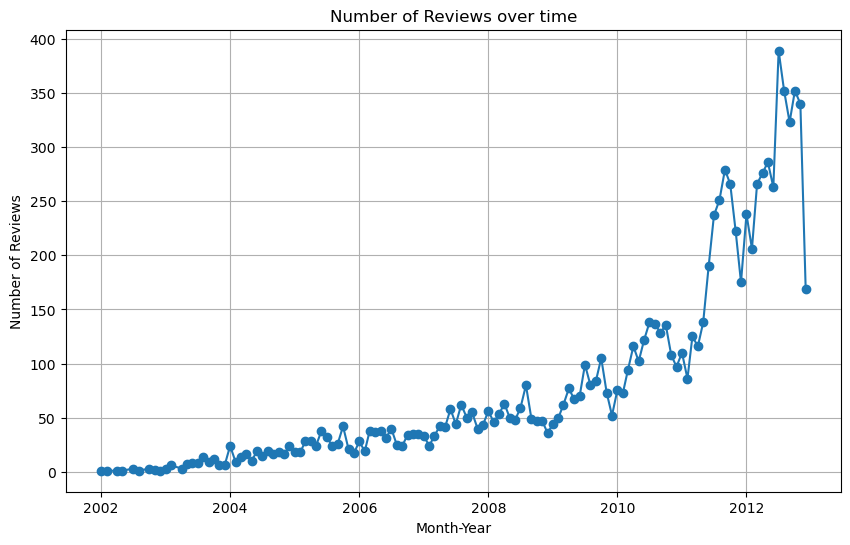

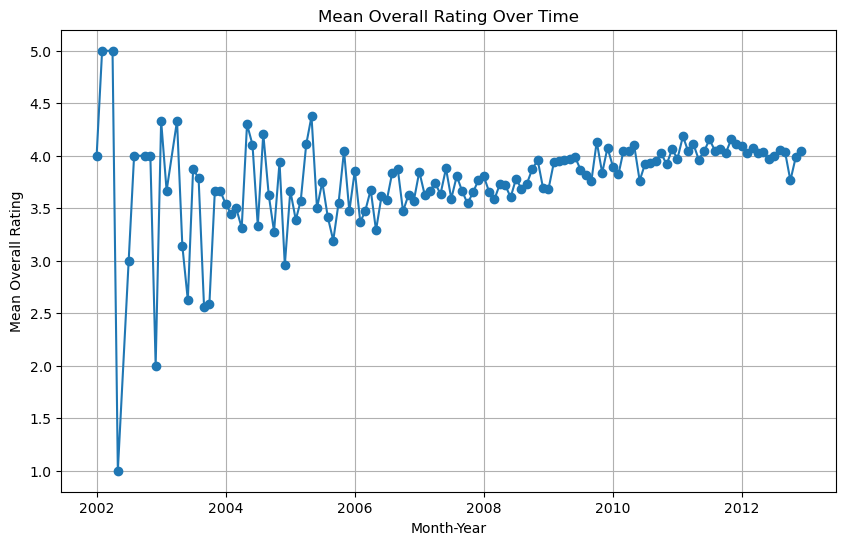

count    128.0000
mean      78.1250
std       89.5461
min        1.0000
25%       19.0000
50%       43.5000
75%       99.7500
max      389.0000
Name: count, dtype: float64
count    128.000000
mean       3.763463
std        0.464675
min        1.000000
25%        3.621976
50%        3.837808
75%        4.024199
max        5.000000
Name: mean_overall, dtype: float64


In [3]:
import matplotlib.pyplot as plt

dev_data['month_year']=pd.to_datetime(dev_data['date'])

dev_data['month_year']=dev_data['month_year'].dt.to_period('M')

dev_data['overall'] = dev_data['ratings'].apply(lambda x: x['overall'])

result = dev_data.groupby('month_year')['overall'].mean().reset_index(name='mean_overall')

count = dev_data.groupby('month_year').size().reset_index(name='count')

count['month_year']=pd.to_datetime(count['month_year'].astype(str))

plt.figure(figsize=(10,6))
plt.plot(count['month_year'],count['count'],marker='o',linestyle='-')
plt.title('Number of Reviews over time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.grid('true')
plt.show()

# Convert 'month_year' to datetime format for better x-axis representation
result['month_year'] = pd.to_datetime(result['month_year'].astype(str))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(result['month_year'], result['mean_overall'], marker='o', linestyle='-')
plt.title('Mean Overall Rating Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Mean Overall Rating')
plt.grid(True)
plt.show()

print(count['count'].describe())
print(result['mean_overall'].describe())

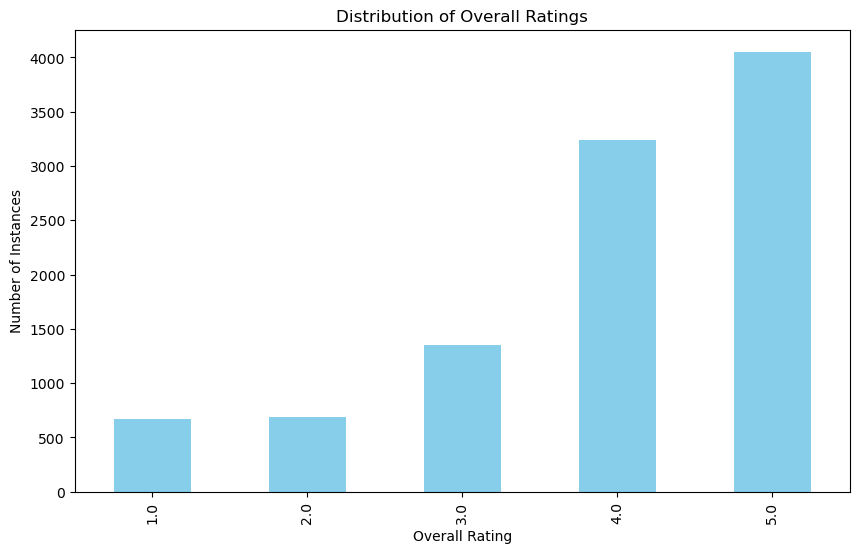

In [4]:
#plotting the rating distribution graph
plt.figure(figsize=(10, 6))
dev_data['overall'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Instances')
plt.show()

In [5]:
class_distribution=dev_data['overall'].value_counts()
print(class_distribution)

overall
5.0    4054
4.0    3237
3.0    1353
2.0     684
1.0     672
Name: count, dtype: int64


In [6]:
majority_class_count = class_distribution.max()
minority_class_count = class_distribution.min()
#Calculating the imbalance ratio 
imbalance_ratio = majority_class_count / minority_class_count
print(f'Imbalance Ratio: {imbalance_ratio}')


Imbalance Ratio: 6.032738095238095


/private/tmp/PKInstallSandbox.WsTgIX/tmp/ipykernel_58298/3066960484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data['unique_words_count'] = dev_data['cleaned'].apply(lambda x: len(set(str(x).split())))
/Users/kishaiyanthangaraj/anaconda3/envs/work/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


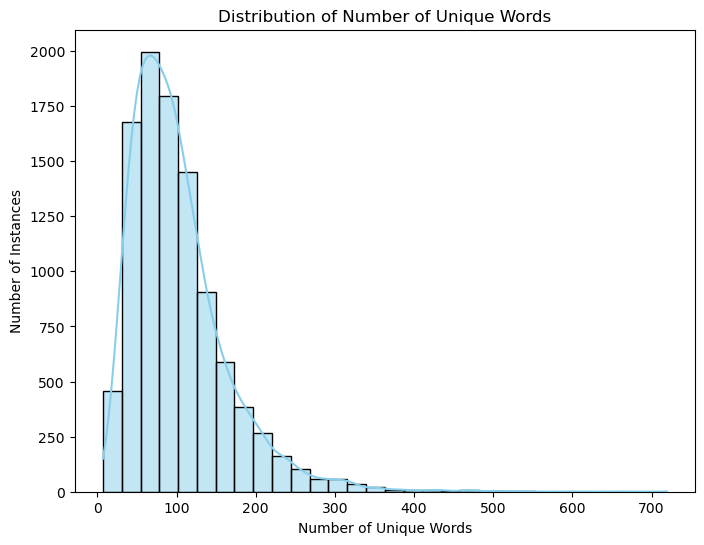

count    10000.000000
mean       102.003000
std         61.802077
min          7.000000
25%         59.000000
50%         89.000000
75%        128.000000
max        719.000000
Name: unique_words_count, dtype: float64


In [7]:
import seaborn as sns

dev_data['unique_words_count'] = dev_data['cleaned'].apply(lambda x: len(set(str(x).split())))


# Displaying the distribution of the number of unique words
plt.figure(figsize=(8, 6))
sns.histplot(dev_data['unique_words_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Unique Words')
plt.xlabel('Number of Unique Words')
plt.ylabel('Number of Instances')
plt.show()

print(dev_data['unique_words_count'].describe())


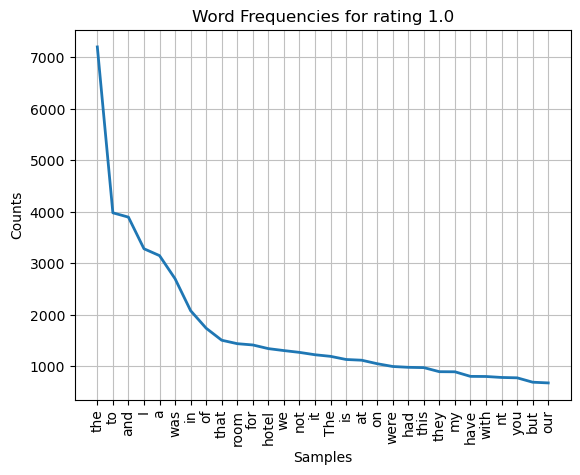

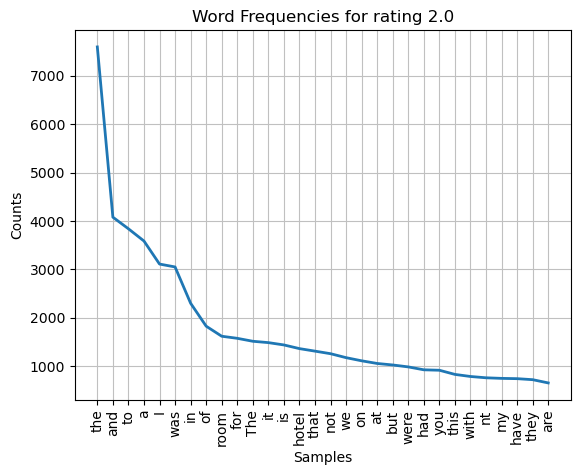

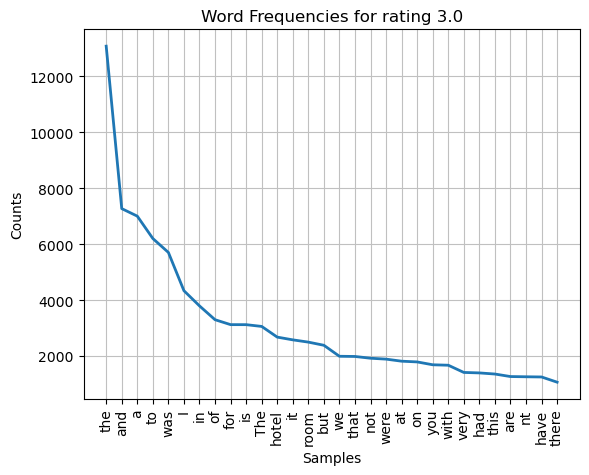

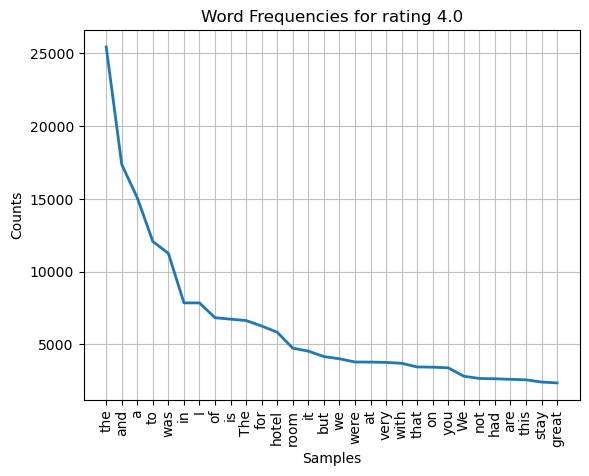

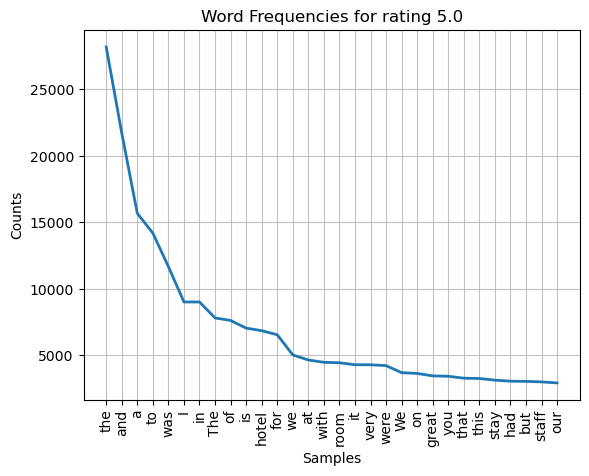

<Axes: title={'center': 'Word Frequencies for rating 5.0'}, xlabel='Samples', ylabel='Counts'>

In [8]:
#Getting word Frequency for a given rating:
from nltk.probability import FreqDist

def get_word_frequency(rating):
    overall_text=' '.join(dev_data[dev_data['overall']==rating]['cleaned'])
    tokens=word_tokenize(overall_text)
    fdist=FreqDist(tokens)
    return fdist
# Word frequency for rating 1
one_freq=get_word_frequency(1)
plt.title('Word Frequencies for rating 1.0')
one_freq.plot(30, cumulative=False)
# Word frequency for rating 2
two_freq=get_word_frequency(2)
plt.title('Word Frequencies for rating 2.0')
two_freq.plot(30, cumulative=False)
# Word frequency for rating 3
three_freq=get_word_frequency(3)
plt.title('Word Frequencies for rating 3.0')
three_freq.plot(30, cumulative=False)
# Word frequency for rating 4
four_freq=get_word_frequency(4)
plt.title('Word Frequencies for rating 4.0')
four_freq.plot(30, cumulative=False)
# Word frequency for rating 5
five_freq=get_word_frequency(5)
plt.title('Word Frequencies for rating 5.0')
five_freq.plot(30, cumulative=False)


I started my Analysis by plotting a graph between time and reviews to find if there is any relation between the business's operation during particular time for example, during Recession,flood,etc. The second graph is the distribution of overall ratings to check if the dataset is balanced or not. The next graph is about the number of unique words per review, which can give insights on the length of the review giving sentiments. The final graph is for word frequencies for every rating,giving us insights into the most commonly used words for every rating which might not have much contribution to the sentiment of the sentence.

### 3. Preprocessing

In [9]:
from sklearn.utils import resample

#Separating all the overall ratings to oversample certain ratings to improve the model
overall_1 = dev_data[dev_data['overall'] == 1.0]
overall_2 = dev_data[dev_data['overall'] == 2.0]
overall_3 = dev_data[dev_data['overall'] == 3.0]
overall_4 = dev_data[dev_data['overall'] == 4.0]
overall_5 = dev_data[dev_data['overall'] == 5.0]

#selected_size for downsampling and upsampling
desired_size = 2000
up_size=3500

upsampled_1 = resample(overall_1, replace=True, n_samples=desired_size, random_state=42)
upsampled_2 = resample(overall_2, replace=True, n_samples=desired_size, random_state=42)
upsampled_3 = resample(overall_3, replace=True, n_samples=desired_size, random_state=42)
upsampled_4=resample(overall_4,replace=True,n_samples=up_size,random_state=42)

print(upsampled_1.shape, upsampled_2.shape,upsampled_3.shape,upsampled_4.shape)



(2000, 14) (2000, 14) (2000, 14) (3500, 14)


In [10]:

# Creating new dataframe with balanced dataset
combined_data = pd.concat([overall_5,upsampled_4,upsampled_3,upsampled_1,upsampled_2])

# Shuffle the combined data to mix the classes
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the shape of the combined data
print(combined_data.shape)

(13554, 14)


### 4. Selecting supervised method for sentiment classification

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
# Split the data
X_train, X_test, y_train, y_test = train_test_split(combined_data['cleaned'], combined_data['overall'], test_size=0.3, random_state=42)

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes model
mnb = MultinomialNB()
rf=RandomForestClassifier()
lm=LinearRegression()

# Train the model
mnb.fit(X_train_transformed, y_train)
rf.fit(X_train_transformed,y_train)

# Make predictions on the test data
y_pred_mnb = mnb.predict(X_test_transformed)
y_pred_rf=rf.predict(X_test_transformed)
# Print evaluation metrics
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("F1 score:", f1_score(y_test, y_pred_mnb, average='weighted'))
print(classification_report(y_test, y_pred_mnb))

print("Random forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 score:", f1_score(y_test, y_pred_rf, average='weighted'))
print(classification_report(y_test, y_pred_rf))

Multinomial Naive Bayes:
Accuracy: 0.5615933120236046
F1 score: 0.5175843512289833
              precision    recall  f1-score   support

         1.0       0.93      0.68      0.78       594
         2.0       0.94      0.30      0.46       611
         3.0       1.00      0.02      0.05       569
         4.0       0.39      0.52      0.44      1065
         5.0       0.57      0.92      0.70      1228

    accuracy                           0.56      4067
   macro avg       0.76      0.49      0.49      4067
weighted avg       0.69      0.56      0.52      4067

Random forest:
Accuracy: 0.8288664863535776
F1 score: 0.8284741254913485
              precision    recall  f1-score   support

         1.0       0.96      0.93      0.95       594
         2.0       0.98      0.90      0.94       611
         3.0       0.97      0.69      0.81       569
         4.0       0.81      0.68      0.74      1065
         5.0       0.71      0.94      0.81      1228

    accuracy                 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lm=LinearRegression()

lm.fit(X_train_transformed,y_train)

y_pred=lm.predict(X_test_transformed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Linear Regression Model:
Mean Squared Error: 0.45190094753674587
R-squared: 0.7768178076368385


In [13]:
from sklearn.svm import SVC

svm=SVC(kernel='linear',C=1)
svm.fit(X_train_transformed,y_train)

y_pred_svm=svm.predict(X_test_transformed)
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 score:", f1_score(y_test, y_pred_svm,average=None))
print(classification_report(y_test, y_pred_svm))

SVM:
Accuracy: 0.800590115564298
F1 score: [0.9390142  0.87851971 0.74909091 0.69901083 0.80453258]
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       594
         2.0       0.86      0.89      0.88       611
         3.0       0.78      0.72      0.75       569
         4.0       0.70      0.70      0.70      1065
         5.0       0.80      0.81      0.80      1228

    accuracy                           0.80      4067
   macro avg       0.81      0.81      0.81      4067
weighted avg       0.80      0.80      0.80      4067



In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train_transformed,y_train)

y_pred_knn=knn.predict(X_test_transformed)

print("KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN:
Accuracy: 0.5421686746987951
              precision    recall  f1-score   support

         1.0       0.57      0.82      0.67       594
         2.0       0.58      0.67      0.62       611
         3.0       0.44      0.50      0.47       569
         4.0       0.49      0.57      0.52      1065
         5.0       0.69      0.34      0.46      1228

    accuracy                           0.54      4067
   macro avg       0.55      0.58      0.55      4067
weighted avg       0.57      0.54      0.53      4067



In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, activation='relu', solver='adam', random_state=42)

mlp.fit(X_train_transformed,y_train)

y_pred_mlp=mlp.predict(X_test_transformed)

print("MLP:")
print("Accuracy:",accuracy_score(y_test,y_pred_mlp))
print("f1 Score:",f1_score(y_test,y_pred_mlp,average='weighted'))
print(classification_report(y_test,y_pred_mlp))

MLP:
Accuracy: 0.8163265306122449
f1 Score: 0.8169539338223923
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96       594
         2.0       0.93      0.91      0.92       611
         3.0       0.83      0.79      0.81       569
         4.0       0.70      0.74      0.72      1065
         5.0       0.79      0.77      0.78      1228

    accuracy                           0.82      4067
   macro avg       0.84      0.84      0.84      4067
weighted avg       0.82      0.82      0.82      4067



I have chosen accracy as the model's performance indicator because accuracy is the measure that gives you the entire model's performance and the classification report gives us insight to every rating prediction. I am choosing RandomForestClassifier as my Machine Learning model as it has the highest accuracy score and has almost 90% average predicting every rating.

In [16]:
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score


new_rf=RandomForestClassifier()
# Removing stop words 
def remove_stopwords(text):
    stop_words=stopwords.words('english')
    tokens=word_tokenize(text)
    words=[token for token in tokens if token not in stop_words]
    return ' '.join(words) 
combined_data['lower']=combined_data['cleaned'].apply(remove_stopwords)
print(combined_data['lower'])
# transforming the processed data
X_trans=vectorizer.fit_transform(combined_data['lower'])
y=combined_data['overall']

cross_val_scores=cross_val_score(new_rf,X_trans,y,cv=10,scoring='accuracy')

print("Average Accuracy:", cross_val_scores.mean())

0        Was fantastic I stayed four nights late Octobe...
1        Worst hotel experience ages My wife described ...
2        All well Hotel Mela We booked girls trip NYC s...
3        Good Hotel sights Hollywood We stayed part sta...
4        It good value paid much It absolutely fine It ...
                               ...                        
13549    Shopper Dream Attended conference held Westin ...
13550    Keep driving I stayed hotel April 6th8th I boo...
13551    Nice location clean quiet I stayed one night b...
13552    Will back It pays belong SPG From airport SFO ...
13553    Great Time Great Golf We spent three days nigh...
Name: lower, Length: 13554, dtype: object
Average Accuracy: 0.8626246612023643


In [17]:
import spacy

nlp=spacy.load('en_core_web_md')
# Lemmatizing the text/data
def lemmatize_words(text):
    doc=nlp(text)
    return ' '.join([token.lemma_ for token in doc])


combined_data['lemma']=combined_data['cleaned'].apply(lemmatize_words)
# Transforming the processed data
X_trans=vectorizer.fit_transform(combined_data['lemma'])
y=combined_data['overall']

cross_val_scores=cross_val_score(new_rf,X_trans,y,cv=10,scoring='accuracy')

print("Average Accuracy:", cross_val_scores.mean())

Average Accuracy: 0.8616649794816531


In [18]:
# Lower casing the text from the dataset
def lowercasing(text):
    return text.lower()

combined_data['low'] = combined_data['cleaned'].apply(lowercasing)
# Transforming the processed text
X_trans = vectorizer.fit_transform(combined_data['low'])
y = combined_data['overall']

cross_val_scores = cross_val_score(new_rf, X_trans, y, cv=10, scoring='accuracy')

print("Average Accuracy:", cross_val_scores.mean())


Average Accuracy: 0.8581236869890823


In [19]:
stop_words = set(stopwords.words('english'))
# Stop Word removal
def pre_process(text):
    tokens = word_tokenize(text)
    
    filtered_words = [token for token in tokens if token not in stop_words]
    
    return ' '.join(filtered_words)

combined_data['pre_processed'] = combined_data['cleaned'].apply(pre_process)

print(combined_data['pre_processed'].head())


0    Was fantastic I stayed four nights late Octobe...
1    Worst hotel experience ages My wife described ...
2    All well Hotel Mela We booked girls trip NYC s...
3    Good Hotel sights Hollywood We stayed part sta...
4    It good value paid much It absolutely fine It ...
Name: pre_processed, dtype: object


In [20]:
final_rf = RandomForestClassifier()
# Splitting the data into test and train
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(combined_data['pre_processed'], combined_data['overall'], test_size=0.2, random_state=42)
# Transforming the textual data to numerical
X_train_trans_final = vectorizer.fit_transform(X_train_final)
X_test_trans_final = vectorizer.transform(X_test_final)
# Training the model
final_rf.fit(X_train_trans_final, y_train_final)
# Predicting the rating
y_pred_final = final_rf.predict(X_test_trans_final)

print("Random forest:")
print("Accuracy:", accuracy_score(y_test_final, y_pred_final))
print("F1 score:", f1_score(y_test_final, y_pred_final, average='weighted'))
print(classification_report(y_test_final, y_pred_final))


Random forest:
Accuracy: 0.8384360014754703
F1 score: 0.8380091220126492
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       380
         2.0       0.99      0.92      0.96       402
         3.0       0.99      0.72      0.83       378
         4.0       0.82      0.67      0.74       717
         5.0       0.71      0.94      0.81       834

    accuracy                           0.84      2711
   macro avg       0.90      0.84      0.86      2711
weighted avg       0.86      0.84      0.84      2711



The proper pre-processing that gives me better result is removing all the stop words improves the model sightly as per the 10-fold cross validation performed only on removing stop words having more accuracy. I have experimented by mixing and matching the pre-processing techniques and have decided to implement only removal of stop words.

### 5. Sentiment classification using VADER lexicon and method

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Assuming dev_data['cleaned'] contains the text data
cleaned_text = combined_data['pre_processed']

# Initialize the VADER SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each cleaned text
sentiment_scores = cleaned_text.apply(lambda x: sid.polarity_scores(x))

# Extract compound scores from the sentiment scores
combined_data['compound_scores'] = sentiment_scores.apply(lambda x: x['compound'])

bins = [-1.0, -0.525, -0.30, 0.10, 0.625, 1.0]

# Create labels for the bins
labels = [1, 2, 3, 4, 5]

# Apply binning to create a new column 'predicted_overall'
combined_data['predicted_overall'] = pd.cut(combined_data['compound_scores'], bins=bins, labels=labels)

print('Accuracy',accuracy_score(combined_data['overall'],combined_data['predicted_overall']))




Accuracy 0.3770104766120702


The Vader Sentiment Scores used to predict the overall rating has an accuracy of 37% which is less than the machine learning model having 85%. 

### 6. Combining VADER with the best classifier

In [22]:
# Combining the vader sentiment to the model
X_text=combined_data['pre_processed']
X_num=combined_data['compound_scores']
y=combined_data['overall']

X_text_transformed=vectorizer.fit_transform(X_text)
# combining two features to be trained
X_combined=pd.concat([pd.DataFrame(X_text_transformed.toarray(),X_num)],axis=1)
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X_combined,y,test_size=0.2,random_state=42)
# Training the model
final_rf.fit(X_train,y_train)
# predicting the overall rating
y_pred_comb=final_rf.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_pred_comb))
print('classification report:',classification_report(y_test,y_pred_comb))


Accuracy: 0.8472888233124308
classification report:               precision    recall  f1-score   support

         1.0       0.97      0.96      0.96       380
         2.0       0.99      0.92      0.95       402
         3.0       0.98      0.72      0.83       378
         4.0       0.84      0.68      0.76       717
         5.0       0.73      0.96      0.82       834

    accuracy                           0.85      2711
   macro avg       0.90      0.85      0.87      2711
weighted avg       0.87      0.85      0.85      2711



The vader sentiment score is added to the machine learning model to check if it improves the model's performance. The sentiment score could be very tricky to predict the scores as the sentiment scores can overflow, meaning it doesn not have proper boundary for every rating example : the range of sentiment score for 5.0 is 1.0 to 0.500 and the range of sentiment score for 4.0 is 0.90 to 0.423. Therefore, the vader sentiment doesnot improve the model's performance rather it reduces the model's performance

### 7. Training and testing the final method

In [23]:
# starting the preprocessing with extracting overall from ratings
train_data['overall']=train_data['ratings'].apply(lambda x:x['overall'])
test_data['overall']=test_data['ratings'].apply(lambda x:x['overall'])

/private/tmp/PKInstallSandbox.WsTgIX/tmp/ipykernel_58298/3389573408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['overall']=train_data['ratings'].apply(lambda x:x['overall'])
/private/tmp/PKInstallSandbox.WsTgIX/tmp/ipykernel_58298/3389573408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['overall']=test_data['ratings'].apply(lambda x:x['overall'])


In [24]:
# Oversampling minority to balance the dataset 
overall_1 = train_data[train_data['overall'] == 1.0]
overall_2 = train_data[train_data['overall'] == 2.0]
overall_3 = train_data[train_data['overall'] == 3.0]
overall_4 = train_data[train_data['overall'] == 4.0]
overall_5 = train_data[train_data['overall'] == 5.0]

desired_size = 2000
up_size=3500
upsampled_1 = resample(overall_1, replace=True, n_samples=desired_size, random_state=42)
upsampled_2 = resample(overall_2, replace=True, n_samples=desired_size, random_state=42)
upsampled_3 = resample(overall_3, replace=True, n_samples=desired_size, random_state=42)
upsampled_4=resample(overall_4,replace=True,n_samples=up_size,random_state=42)

print(upsampled_1.shape, upsampled_2.shape,upsampled_3.shape,upsampled_4.shape)

(2000, 12) (2000, 12) (2000, 12) (3500, 12)


In [25]:
#combining all the upsampled data to create new dataset
combined_data_train = pd.concat([overall_5,upsampled_4,upsampled_3,upsampled_1,upsampled_2])

# Shuffle the combined data to mix the classes
combined_data_train = combined_data_train.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the shape of the combined data
print(combined_data_train.shape)

(13636, 12)


In [26]:
overall_1 = test_data[test_data['overall'] == 1.0]
overall_2 = test_data[test_data['overall'] == 2.0]
overall_3 = test_data[test_data['overall'] == 3.0]
overall_4 = test_data[test_data['overall'] == 4.0]
overall_5 = test_data[test_data['overall'] == 5.0]

desired_size = 2000
up_size=3500
upsampled_1 = resample(overall_1, replace=True, n_samples=desired_size, random_state=42)
upsampled_2 = resample(overall_2, replace=True, n_samples=desired_size, random_state=42)
upsampled_3 = resample(overall_3, replace=True, n_samples=desired_size, random_state=42)
upsampled_4=resample(overall_4,replace=True,n_samples=up_size,random_state=42)

combined_data_test = pd.concat([overall_5,upsampled_4,upsampled_3,upsampled_1,upsampled_2])

# Shuffle the combined data to mix the classes
combined_data_test = combined_data_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the shape of the combined data
print(combined_data_test.shape)

(13603, 12)


In [32]:
def remove_stopwords(text):
   tokens=word_tokenize(text)
   filtered=[token for token in tokens if token not in stop_words]
   return ' '.join(filtered)

combined_data_train['pre_processed']=combined_data_train['cleaned'].apply(remove_stopwords)
combined_data_test['pre_processed']=combined_data_test['cleaned'].apply(remove_stopwords)


In [33]:

# Split the data
X_train=combined_data_train['pre_processed']
X_test=combined_data_test['pre_processed']
y_train=combined_data_train['overall']
y_test=combined_data_test['overall']


# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

# Initialize the Random Forest Classifier
final_rf = RandomForestClassifier()

# Train the model
final_rf.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = final_rf.predict(X_test_transformed)

# Print accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.439608909799309


The best pre-processing method was used on both training and testing data.The model performs well when either the training or the testing is split into testing and training but when it is trained on training data and tested on testing data the performance of the model drops significantly. The distibution of unseen data might be different from the training data. The samples in training data and testing data might not have similar patterns.

### 8. Reviews aspect prediction

The proposed approach for modeling aspect ratings involves identifying words that exhibit a direct influence on specific aspects. By establishing correlations between words and corresponding aspect ratings, the model aims to capture the nuanced impact of language on different aspects of the hotel experience. For instance, sentences expressing sentiments about the location, such as "I hate the location of this hotel," are singled out, and words specific to the aspect (e.g., 'location') are identified.

The subsequent step involves segregating sentences containing these aspect-specific words, creating subsets tailored to each aspect. These sentence sets are then utilized to train and test aspect-specific models, focusing on predicting the ratings associated with individual aspects. This targeted approach allows the model to discern the impact of distinct words on each aspect rating, enabling more precise predictions.

Throughout the process, appropriate pre-processing techniques are applied to enhance the model's understanding of the contextual relationships between words and aspect ratings. By repeating this methodology for each aspect, the model becomes adept at recognizing the language nuances associated with various facets of the hotel experience. This nuanced understanding facilitates accurate predictions for individual aspect ratings, providing a comprehensive and detailed analysis of customer feedback.

In summary, the proposed model leverages the correlation between aspect-specific words and ratings, employing tailored sentence sets for each aspect to train and test focused models. This strategy enhances the model's ability to capture the unique linguistic cues associated with different aspects, ultimately leading to more accurate predictions of aspect ratings in hotel reviews.

### 9. References

D, Chaithra. (2019). Hybrid approach: naive bayes and sentiment VADER for analyzing sentiment of mobile unboxing video comments. International Journal of Electrical and Computer Engineering (IJECE). 9. 4452. 10.11591/ijece.v9i5.pp4452-4459. 



The code debugging was done with ChatGPT 3.5 . The prompt used was What is wrong in this block of code